# In this tutorial we will be writing Logistic Regression code for Multiple variables from Scratch using `numpy` and `vectorization` 

## importing the relevant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

## Writing the compute_cost function for calculating cost

In [16]:
def compute_cost(x,y,w,b):
    y=y.reshape(-1,1)
    w=w.reshape(-1,1)
    m=x.shape[0]
    f_wb=sigmoid(np.dot(x,w)+b)
    cost=(-1/m)*(np.dot(y.T,np.log(f_wb))+np.dot((1-y).T,np.log(1-f_wb)))
    return cost

In [25]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
w=np.array([1,1])
b=1
iterations=5000
alpha=0.01
compute_cost(x_train,y_train,w,b)

array([[1.52909548]])

## Writing a function to compute gradient of weights and bias in case of Multiple variables/features

In [26]:
def compute_gradient(x,y,w,b):
    y=y.reshape(-1,1)
    w=w.reshape(-1,1)
    m=x.shape[0]
    f_wb=sigmoid(np.dot(x,w)+b)
    delta=f_wb-y
    dj_dw=(1/m)*(np.dot(delta.T,x))
    dj_db=(1/m)*np.sum(delta)
    return dj_dw,dj_db

In [27]:
compute_gradient(x_train,y_train,w,b)

(array([[0.46673148, 0.46856264]]), 0.4715092740469715)

## Writing the gradientDescent Calculator function for Multiple features

In [28]:
def compute_gradientDescent(x,y,w,b,iterations,alpha):
    J_hist=[]
    weights=[]
    bias=[]
    m=x.shape[0]
    for i in range(iterations):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        J_hist.append(compute_cost(x,y,w,b))
        weights.append(w)
        bias.append(b)
        if (i+1)%100==0:
            print('Iteration: {0} Cost: {1}'.format(i+1,J_hist[-1]))
    return w,b,J_hist,weights,bias

In [29]:
w_final,b_final,J_record,w_record,b_record=compute_gradientDescent(x_train,y_train,w,b,iterations,alpha)

Iteration: 100 Cost: [[0.97147523]]
Iteration: 200 Cost: [[0.71773101]]
Iteration: 300 Cost: [[0.65814102]]
Iteration: 400 Cost: [[0.63783294]]
Iteration: 500 Cost: [[0.62244123]]
Iteration: 600 Cost: [[0.60811694]]
Iteration: 700 Cost: [[0.59443049]]
Iteration: 800 Cost: [[0.58128343]]
Iteration: 900 Cost: [[0.56862225]]
Iteration: 1000 Cost: [[0.55640828]]
Iteration: 1100 Cost: [[0.54461148]]
Iteration: 1200 Cost: [[0.53320759]]
Iteration: 1300 Cost: [[0.52217631]]
Iteration: 1400 Cost: [[0.51150009]]
Iteration: 1500 Cost: [[0.50116341]]
Iteration: 1600 Cost: [[0.49115215]]
Iteration: 1700 Cost: [[0.48145334]]
Iteration: 1800 Cost: [[0.47205485]]
Iteration: 1900 Cost: [[0.46294524]]
Iteration: 2000 Cost: [[0.45411368]]
Iteration: 2100 Cost: [[0.44554983]]
Iteration: 2200 Cost: [[0.4372438]]
Iteration: 2300 Cost: [[0.42918614]]
Iteration: 2400 Cost: [[0.42136776]]
Iteration: 2500 Cost: [[0.41377993]]
Iteration: 2600 Cost: [[0.4064143]]
Iteration: 2700 Cost: [[0.39926279]]
Iteration: 2

In [39]:
w_final

array([[1.53496699, 1.2844167 ]])

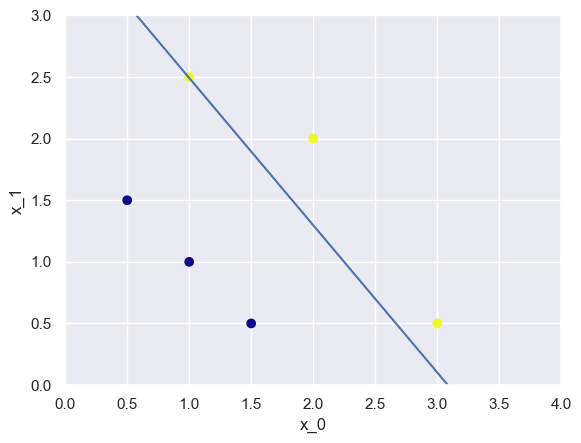

In [45]:
x0=[]
x1=[]
x=np.arange(5)
y=-w_final[0][0]/w_final[0][1]*x-b_final
for i in range(x_train.shape[0]):
    x0.append(x_train[i][0])
    x1.append(x_train[i][1])
plt.scatter(x0,x1,c=y_train,cmap='plasma')
plt.plot(x,y)
plt.axis([0,4,0,3])
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()